In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot
%matplotlib inline

In [2]:
test_df=pd.read_csv('loan_test.csv',index_col='Loan_ID')
train_df=pd.read_csv('loan_train.csv',index_col='Loan_ID')

In [3]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 367 entries, LP001015 to LP002989
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             356 non-null    object 
 1   Married            367 non-null    object 
 2   Dependents         357 non-null    object 
 3   Education          367 non-null    object 
 4   Self_Employed      344 non-null    object 
 5   ApplicantIncome    367 non-null    int64  
 6   CoapplicantIncome  367 non-null    int64  
 7   LoanAmount         362 non-null    float64
 8   Loan_Amount_Term   361 non-null    float64
 9   Credit_History     338 non-null    float64
 10  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(6)
memory usage: 34.4+ KB


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 614 entries, LP001002 to LP002990
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             601 non-null    object 
 1   Married            611 non-null    object 
 2   Dependents         599 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      582 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         592 non-null    float64
 8   Loan_Amount_Term   600 non-null    float64
 9   Credit_History     564 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 62.4+ KB


In [5]:
test_df['Loan_Status']=-55

In [6]:
df=pd.concat((train_df,test_df))

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 99.6+ KB


In [8]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [9]:
df.tail()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777.0,113.0,360.0,1.0,Urban,-55
LP002975,Male,Yes,0,Graduate,No,4158,709.0,115.0,360.0,1.0,Urban,-55
LP002980,Male,No,0,Graduate,No,3250,1993.0,126.0,360.0,NaN,Semiurban,-55
LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,-55
LP002989,Male,No,0,Graduate,Yes,9200,0.0,98.0,180.0,1.0,Rural,-55


In [10]:
male_applicant=df.loc[df['Gender']=='Male',]
print(f'Numbers of male applicants is: {len(male_applicant)}')

Numbers of male applicants is: 775


In [11]:
female_applicant=df.loc[df['Gender']=='Female',]
print(f'Numbers of female applicants is: {len(female_applicant)}')

Numbers of female applicants is: 182


In [12]:
total_applicant=len(male_applicant) + len(female_applicant)
print(f'Total Numbers of applicants is : {total_applicant}')

Total Numbers of applicants is : 957


In [13]:
#males self employed and married
male_married_selfemployed=df.loc[((df.Gender=='Male') & (df.Married=='Yes') & (df.Self_Employed=='Yes')),:]
print(f'Numbers of married self employed male applicants is:{len(male_married_selfemployed)}')

Numbers of married self employed male applicants is:71


In [14]:
#females self employed and married
female_married_selfemployed=df.loc[((df.Gender=='Female') & (df.Married=='Yes') & (df.Self_Employed=='Yes')),:]
print(f'Numbers of married self employed male applicants is:{len(female_married_selfemployed)}')

Numbers of married self employed male applicants is:4


In [15]:
male_graduates=df.loc[((df.Gender=='Male')&(df.Education=='Graduate')),:]
print(f'Numbers of male graduates is: {len(male_graduates)}')

Numbers of male graduates is: 596


In [16]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


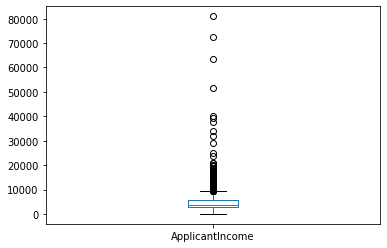

In [17]:
df.ApplicantIncome.plot(kind='box');

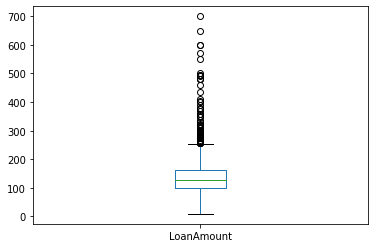

In [18]:
df.LoanAmount.plot(kind='box');

In [19]:
df.describe(include='all')

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,957,978,956,981,926,981.000000,981.000000,954.000000,961.000000,902.000000,981,981
unique,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,3
top,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,775,631,545,763,807,NaN,NaN,NaN,NaN,NaN,349,422
mean,NaN,NaN,NaN,NaN,NaN,5179.795107,1601.916330,142.511530,342.201873,0.835920,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,5695.104533,2718.772806,77.421743,65.100602,0.370553,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,9.000000,6.000000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,2875.000000,0.000000,100.000000,360.000000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,3800.000000,1110.000000,126.000000,360.000000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,5516.000000,2365.000000,162.000000,360.000000,1.000000,NaN,NaN


In [20]:
df[df.Loan_Status!=-55].Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [21]:
df.Property_Area.value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

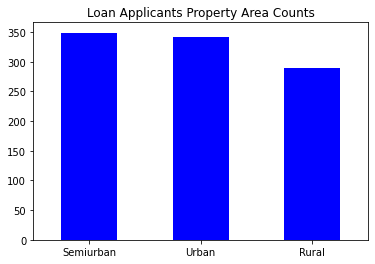

In [22]:
df.Property_Area.value_counts().plot(kind='bar',rot=0,title='Loan Applicants Property Area Counts',color='b');

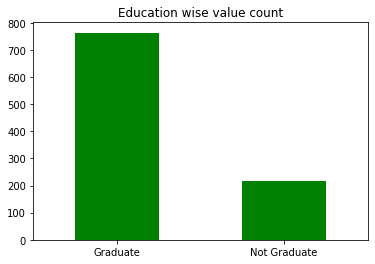

In [23]:
df.Education.value_counts().plot(kind='bar',rot=0,title='Education wise value count',color='g');

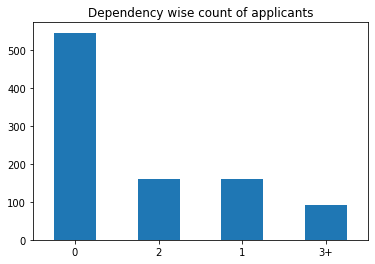

In [24]:
df.Dependents.value_counts().plot(kind='bar',rot=0,title='Dependency wise count of applicants');

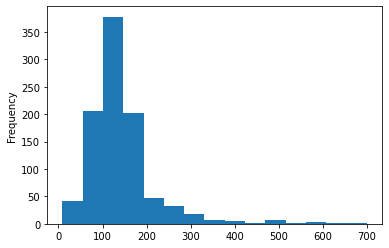

In [25]:
df.LoanAmount.plot(kind='hist',rot=0,bins=15);

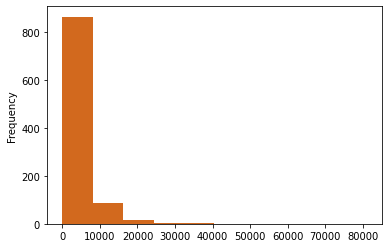

In [26]:
df.ApplicantIncome.plot(kind='hist',rot=0,color='chocolate',bins=10);

In [27]:
loan_amt=df.LoanAmount.skew()
app_income=df.ApplicantIncome.skew()
print(f'The skewness of the loan amount is: {loan_amt}')
print(f'The skewness of the Applicants income is: {app_income}')

The skewness of the loan amount is: 2.7140357990713793
The skewness of the Applicants income is: 7.086961153594506


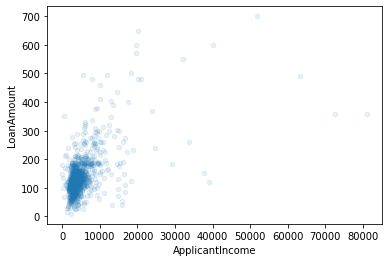

In [28]:
df.plot.scatter(x='ApplicantIncome',y='LoanAmount',rot=0,alpha=0.1);

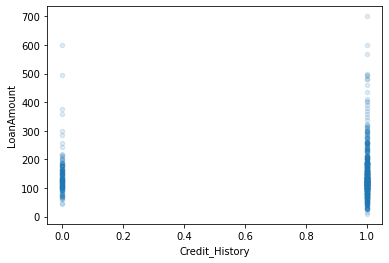

In [29]:
df.plot.scatter(x='Credit_History',y='LoanAmount',alpha=0.15);

In [30]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [31]:
df.groupby(['Married']).agg({'ApplicantIncome':'median','LoanAmount':'median'})

,ApplicantIncome,LoanAmount
Married,,
No,3676,116.5
Yes,3863,131.5


In [32]:
df.groupby(['Gender','Education','Married']).LoanAmount.median()

Gender  Education     Married
Female  Graduate      No         110.5
                      Yes        120.0
        Not Graduate  No         106.0
                      Yes        117.0
Male    Graduate      No         126.0
                      Yes        138.0
        Not Graduate  No         109.5
                      Yes        123.5
Name: LoanAmount, dtype: float64

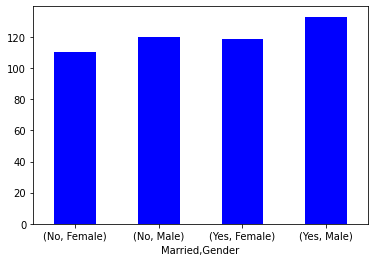

In [33]:
df.groupby(['Married','Gender']).LoanAmount.median().plot(kind='bar',rot=0,color='b');

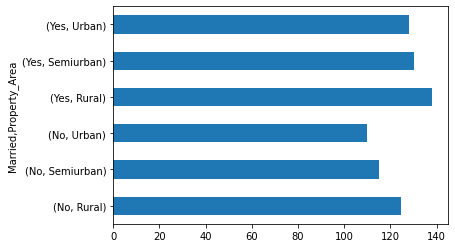

In [34]:
df.groupby(['Married','Property_Area']).LoanAmount.median().plot(kind='barh',rot=0);

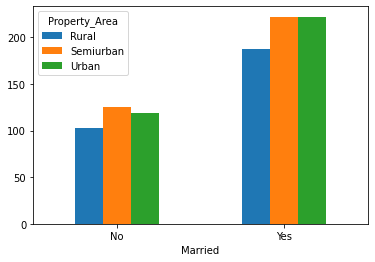

In [35]:
pd.crosstab(df.Married,df.Property_Area).plot(kind='bar',rot=0);

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            978 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 139.6+ KB


In [37]:
df[df.Married.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001357,Male,NaN,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
LP001760,Male,NaN,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
LP002393,Female,NaN,NaN,Graduate,No,10047,0.0,NaN,240.0,1.0,Semiurban,Y


In [38]:
df.Married.value_counts()

Yes    631
No     347
Name: Married, dtype: int64

In [39]:
pd.crosstab(df[df.Loan_Status!=-55].Loan_Status,df[df.Loan_Status!=-55].Married)

Married,No,Yes
Loan_Status,,
N,79,113
Y,134,285


In [40]:
df.groupby(['Married','Property_Area','Gender','Education']).LoanAmount.median()

Married  Property_Area  Gender  Education   
No       Rural          Female  Graduate        132.0
                                Not Graduate    106.0
                        Male    Graduate        136.0
                                Not Graduate    110.0
         Semiurban      Female  Graduate        112.0
                                Not Graduate     72.5
                        Male    Graduate        126.0
                                Not Graduate    117.0
         Urban          Female  Graduate         93.0
                                Not Graduate    122.5
                        Male    Graduate        116.0
                                Not Graduate    100.0
Yes      Rural          Female  Graduate        108.5
                                Not Graduate    131.0
                        Male    Graduate        146.5
                                Not Graduate    129.5
         Semiurban      Female  Graduate        127.0
                                Not G

In [41]:
df.Married.fillna('Y',inplace=True)

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   961 non-null    float64
 9   Credit_History     902 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 139.6+ KB


In [43]:
df[df.Loan_Amount_Term.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,NaN,1.0,Urban,Y
LP001109,Male,Yes,0,Graduate,No,1828,1330.0,100.0,NaN,0.0,Urban,N
LP001136,Male,Yes,0,Not Graduate,Yes,4695,0.0,96.0,NaN,1.0,Urban,Y
LP001137,Female,No,0,Graduate,No,3410,0.0,88.0,NaN,1.0,Urban,Y
LP001250,Male,Yes,3+,Not Graduate,No,4755,0.0,95.0,NaN,0.0,Semiurban,N
LP001391,Male,Yes,0,Not Graduate,No,3572,4114.0,152.0,NaN,0.0,Rural,N
LP001574,Male,Yes,0,Graduate,No,3707,3166.0,182.0,NaN,1.0,Rural,Y
LP001669,Female,No,0,Not Graduate,No,1907,2365.0,120.0,NaN,1.0,Urban,Y
LP001749,Male,Yes,0,Graduate,No,7578,1010.0,175.0,NaN,1.0,Semiurban,Y


In [44]:
df.sort_index()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
LP002986,Male,Yes,0,Graduate,No,5000,2393.0,158.0,360.0,1.0,Rural,-55


In [45]:
df.Loan_Amount_Term.value_counts()

360.0    823
180.0     66
480.0     23
300.0     20
240.0      8
84.0       7
120.0      4
36.0       3
60.0       3
12.0       2
350.0      1
6.0        1
Name: Loan_Amount_Term, dtype: int64

In [46]:
print('The mean of loan amount term:', df.Loan_Amount_Term.mean())
print('The median of loan amount term:', df.Loan_Amount_Term.median())
print('The mode of Loan amount term:',df.Loan_Amount_Term.mode())
print('The standard deviation of loan amount term:',df.Loan_Amount_Term.std())

The mean of loan amount term: 342.2018730489074
The median of loan amount term: 360.0
The mode of Loan amount term: 0    360.0
dtype: float64
The standard deviation of loan amount term: 65.10060192876894


In [47]:
df.groupby(['Gender','Married','Property_Area']).Loan_Amount_Term.median()

Gender  Married  Property_Area
Female  No       Rural            360.0
                 Semiurban        360.0
                 Urban            360.0
        Y        Semiurban        240.0
        Yes      Rural            360.0
                 Semiurban        360.0
                 Urban            360.0
Male    No       Rural            360.0
                 Semiurban        360.0
                 Urban            360.0
        Y        Semiurban        480.0
                 Urban            360.0
        Yes      Rural            360.0
                 Semiurban        360.0
                 Urban            360.0
Name: Loan_Amount_Term, dtype: float64

In [48]:
df['Married']=df.Married.replace('Y','Yes')

In [49]:
median_loan_term=df.Loan_Amount_Term.median()
print(median_loan_term)

360.0


In [50]:
df.Loan_Amount_Term.fillna(median_loan_term,inplace=True)

In [51]:
df.Loan_Amount_Term.isnull().any()

False

In [52]:
df[df.Credit_History.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001034,Male,No,1,Not Graduate,No,3596,0.0,100.0,240.0,NaN,Urban,Y
LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,NaN,Semiurban,N
LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,NaN,Urban,N
LP001123,Male,Yes,0,Graduate,No,2400,0.0,75.0,360.0,NaN,Urban,Y
LP001264,Male,Yes,3+,Not Graduate,Yes,3333,2166.0,130.0,360.0,NaN,Semiurban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
LP002853,Female,No,0,Not Graduate,No,3015,2000.0,145.0,360.0,NaN,Urban,-55
LP002901,Male,No,0,Graduate,No,2283,15000.0,106.0,360.0,NaN,Rural,-55
LP002954,Male,Yes,2,Not Graduate,No,3132,0.0,76.0,360.0,NaN,Rural,-55


In [53]:
df.Credit_History.value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [54]:
df.groupby(['Property_Area','Married','Dependents']).Credit_History.mean()

Property_Area  Married  Dependents
Rural          No       0             0.825000
                        1             1.000000
                        2             0.500000
                        3+            0.750000
               Yes      0             0.846154
                        1             0.785714
                        2             0.795455
                        3+            0.857143
Semiurban      No       0             0.820225
                        1             1.000000
                        2             0.666667
                        3+            1.000000
               Yes      0             0.890110
                        1             0.875000
                        2             0.833333
                        3+            0.666667
Urban          No       0             0.835165
                        1             0.777778
                        2             0.666667
                        3+            0.500000
               Yes      0

In [55]:
df.Credit_History.bfill(inplace=True)

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         954 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 139.6+ KB


In [57]:
df[df.LoanAmount.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
LP001106,Male,Yes,0,Graduate,No,2275,2067.0,NaN,360.0,1.0,Urban,Y
LP001213,Male,Yes,1,Graduate,No,4945,0.0,NaN,360.0,0.0,Rural,N
LP001266,Male,Yes,1,Graduate,Yes,2395,0.0,NaN,360.0,1.0,Semiurban,Y
LP001326,Male,No,0,Graduate,NaN,6782,0.0,NaN,360.0,1.0,Urban,N
LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,NaN,360.0,1.0,Urban,Y
LP001356,Male,Yes,0,Graduate,No,4652,3583.0,NaN,360.0,1.0,Semiurban,Y
LP001392,Female,No,1,Graduate,Yes,7451,0.0,NaN,360.0,1.0,Semiurban,Y
LP001449,Male,No,0,Graduate,No,3865,1640.0,NaN,360.0,1.0,Rural,Y


In [58]:
loan_amt=df.groupby(['Property_Area','Education','Self_Employed']).LoanAmount.transform('median')

In [59]:
df.LoanAmount.fillna(loan_amt,inplace=True)

In [60]:
df.LoanAmount.ffill(inplace=True)

In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      926 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 139.6+ KB


In [62]:
df[df.Self_Employed.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001027,Male,Yes,2,Graduate,NaN,2500,1840.0,109.0,360.0,1.0,Urban,Y
LP001041,Male,Yes,0,Graduate,NaN,2600,3500.0,115.0,360.0,1.0,Urban,Y
LP001052,Male,Yes,1,Graduate,NaN,3717,2925.0,151.0,360.0,1.0,Semiurban,N
LP001087,Female,No,2,Graduate,NaN,3750,2083.0,120.0,360.0,1.0,Semiurban,Y
LP001091,Male,Yes,1,Graduate,NaN,4166,3369.0,201.0,360.0,1.0,Urban,N
LP001326,Male,No,0,Graduate,NaN,6782,0.0,25.0,360.0,1.0,Urban,N
LP001370,Male,No,0,Not Graduate,NaN,7333,0.0,120.0,360.0,1.0,Rural,N
LP001387,Female,Yes,0,Graduate,NaN,2929,2333.0,139.0,360.0,1.0,Semiurban,Y
LP001398,Male,No,0,Graduate,NaN,5050,0.0,118.0,360.0,1.0,Semiurban,Y


In [63]:
df.groupby(['Married']).Self_Employed.value_counts()

Married  Self_Employed
No       No               286
         Yes               40
Yes      No               521
         Yes               79
Name: Self_Employed, dtype: int64

In [64]:
df.Self_Employed.fillna('No',inplace=True)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         956 non-null    object 
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 139.6+ KB


In [66]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [67]:
df['Dependents']=df.Dependents.replace('3+','3')

In [68]:
df['Dependents'] = pd.to_numeric(df['Dependents'],errors='coerce')
df['Dependents']=df['Dependents'].round(decimals=1)

In [69]:
df.Dependents.unique()

array([ 0.,  1.,  2.,  3., nan])

In [70]:
df[df.Dependents.isnull()]

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,,,,,,,,,,,,
LP001350,Male,Yes,NaN,Graduate,No,13650,0.0,119.0,360.0,1.0,Urban,Y
LP001357,Male,Yes,NaN,Graduate,No,3816,754.0,160.0,360.0,1.0,Urban,Y
LP001426,Male,Yes,NaN,Graduate,No,5667,2667.0,180.0,360.0,1.0,Rural,Y
LP001754,Male,Yes,NaN,Not Graduate,Yes,4735,0.0,138.0,360.0,1.0,Urban,N
LP001760,Male,Yes,NaN,Graduate,No,4758,0.0,158.0,480.0,1.0,Semiurban,Y
LP001945,Female,No,NaN,Graduate,No,5417,0.0,143.0,480.0,0.0,Urban,N
LP001972,Male,Yes,NaN,Not Graduate,No,2875,1750.0,105.0,360.0,1.0,Semiurban,Y
LP002100,Male,No,NaN,Graduate,No,2833,0.0,71.0,360.0,1.0,Urban,Y
LP002106,Male,Yes,NaN,Graduate,Yes,5503,4490.0,70.0,360.0,1.0,Semiurban,Y


In [71]:
depend=df.groupby(['Married','Education','Property_Area']).Dependents.transform('median')

In [72]:
df.Dependents.fillna(depend,inplace=True)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             957 non-null    object 
 1   Married            981 non-null    object 
 2   Dependents         981 non-null    float64
 3   Education          981 non-null    object 
 4   Self_Employed      981 non-null    object 
 5   ApplicantIncome    981 non-null    int64  
 6   CoapplicantIncome  981 non-null    float64
 7   LoanAmount         981 non-null    float64
 8   Loan_Amount_Term   981 non-null    float64
 9   Credit_History     981 non-null    float64
 10  Property_Area      981 non-null    object 
 11  Loan_Status        981 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 139.6+ KB


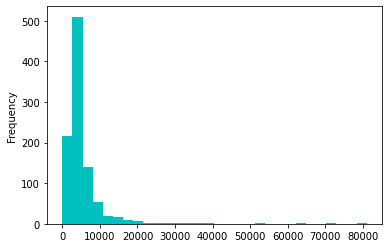

In [74]:
df.ApplicantIncome.plot(kind='hist',bins=30,color='c');

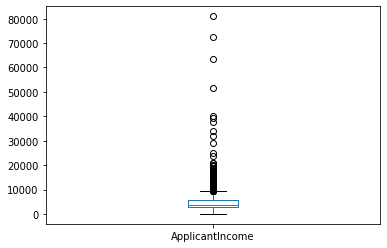

In [75]:
df.ApplicantIncome.plot(kind='box')

In [76]:
pd.qcut(df.ApplicantIncome,4)

Loan_ID
LP001002    (5516.0, 81000.0]
LP001003     (3800.0, 5516.0]
LP001005     (2875.0, 3800.0]
LP001006     (-0.001, 2875.0]
LP001008    (5516.0, 81000.0]
                  ...        
LP002971     (3800.0, 5516.0]
LP002975     (3800.0, 5516.0]
LP002980     (2875.0, 3800.0]
LP002986     (3800.0, 5516.0]
LP002989    (5516.0, 81000.0]
Name: ApplicantIncome, Length: 981, dtype: category
Categories (4, interval[float64]): [(-0.001, 2875.0] < (2875.0, 3800.0] < (3800.0, 5516.0] < (5516.0, 81000.0]]

In [77]:
pd.qcut(df.ApplicantIncome,4,labels=['very_low','low','high','very_high'])

Loan_ID
LP001002    very_high
LP001003         high
LP001005          low
LP001006     very_low
LP001008    very_high
              ...    
LP002971         high
LP002975         high
LP002980          low
LP002986         high
LP002989    very_high
Name: ApplicantIncome, Length: 981, dtype: category
Categories (4, object): [very_low < low < high < very_high]

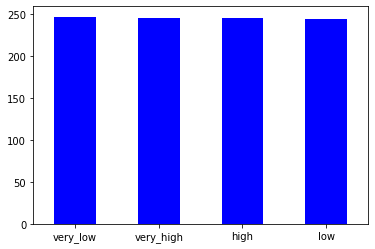

In [78]:
pd.qcut(df.ApplicantIncome,4,labels=['very_low','low','high','very_high']).value_counts().plot(kind='bar',rot=0,color='b')

In [79]:
df['Bin_ApplicantIncome']=pd.qcut(df.ApplicantIncome,4,labels=['very_low','low','high','very_high'])

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               957 non-null    object  
 1   Married              981 non-null    object  
 2   Dependents           981 non-null    float64 
 3   Education            981 non-null    object  
 4   Self_Employed        981 non-null    object  
 5   ApplicantIncome      981 non-null    int64   
 6   CoapplicantIncome    981 non-null    float64 
 7   LoanAmount           981 non-null    float64 
 8   Loan_Amount_Term     981 non-null    float64 
 9   Credit_History       981 non-null    float64 
 10  Property_Area        981 non-null    object  
 11  Loan_Status          981 non-null    object  
 12  Bin_ApplicantIncome  981 non-null    category
dtypes: category(1), float64(5), int64(1), object(6)
memory usage: 140.8+ KB


In [81]:
df.Gender.fillna('Male',inplace=True)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Gender               981 non-null    object  
 1   Married              981 non-null    object  
 2   Dependents           981 non-null    float64 
 3   Education            981 non-null    object  
 4   Self_Employed        981 non-null    object  
 5   ApplicantIncome      981 non-null    int64   
 6   CoapplicantIncome    981 non-null    float64 
 7   LoanAmount           981 non-null    float64 
 8   Loan_Amount_Term     981 non-null    float64 
 9   Credit_History       981 non-null    float64 
 10  Property_Area        981 non-null    object  
 11  Loan_Status          981 non-null    object  
 12  Bin_ApplicantIncome  981 non-null    category
dtypes: category(1), float64(5), int64(1), object(6)
memory usage: 140.8+ KB


In [83]:
df['Credit_Score']=np.where(df['Credit_History']>=1.0,'Good','Bad')

In [84]:
df['Credit_Score'].value_counts()

Good    821
Bad     160
Name: Credit_Score, dtype: int64

In [85]:
pd.crosstab(df[df.Loan_Status!=-55].Loan_Status,df[df.Loan_Status!=-55].Credit_History)

Credit_History,0.0,1.0
Loan_Status,,
N,84,108
Y,13,409


In [86]:
df['FamilySize']=df.Dependents+1

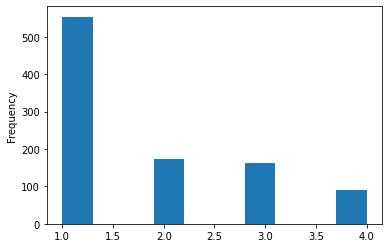

In [87]:
df['FamilySize'].plot(kind='hist',rot=0);

In [88]:
df['Ismother']=np.where(((df.Gender=='Female')&(df.Married=='Yes')&(df.Dependents>0)),1,0)

In [89]:
pd.crosstab(df[df.Loan_Status!=-55].Loan_Status,df[df.Loan_Status!=-55].Ismother)

Ismother,0,1
Loan_Status,,
N,190,2
Y,412,10


In [90]:
df['isMale']=np.where(df.Gender=='Male',1,0)
df['is_SelfEmployed']=np.where(df.Self_Employed=='Yes',1,0)
df['isGraduate']=np.where(df.Education=='Graduate',1,0)

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Gender                         981 non-null    object 
 1   Married                        981 non-null    object 
 2   Dependents                     981 non-null    float64
 3   Education                      981 non-null    object 
 4   Self_Employed                  981 non-null    object 
 5   ApplicantIncome                981 non-null    int64  
 6   CoapplicantIncome              981 non-null    float64
 7   LoanAmount                     981 non-null    float64
 8   Loan_Amount_Term               981 non-null    float64
 9   Credit_History                 981 non-null    float64
 10  Loan_Status                    981 non-null    object 
 11  Credit_Score                   981 non-null    object 
 12  FamilySize                     981 non-null

In [93]:
df=pd.get_dummies(df,columns=['Property_Area','Bin_ApplicantIncome'])

In [97]:
df['isMarried']=np.where(df.Married=='Yes',1,0)

In [99]:
df.drop(['Gender','Married','Education','Self_Employed','Credit_Score'],axis=1,inplace=True)

In [101]:
columns=[column for column in df.columns if column!='Loan_Status']
columns=['Loan_Status']+columns
df=df[columns]

In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 981 entries, LP001002 to LP002989
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Loan_Status                    981 non-null    object 
 1   Dependents                     981 non-null    float64
 2   ApplicantIncome                981 non-null    int64  
 3   CoapplicantIncome              981 non-null    float64
 4   LoanAmount                     981 non-null    float64
 5   Loan_Amount_Term               981 non-null    float64
 6   Credit_History                 981 non-null    float64
 7   FamilySize                     981 non-null    float64
 8   Ismother                       981 non-null    int64  
 9   isMale                         981 non-null    int64  
 10  is_SelfEmployed                981 non-null    int64  
 11  isGraduate                     981 non-null    int64  
 12  Property_Area_Rural            981 non-null

In [103]:
#train
df.loc[df.Loan_Status!=-55].to_csv('trainp.csv')
#test
columns=[column for column in df.columns if column!='Loan_Status']
df.loc[df.Loan_Status==-55,columns].to_csv('testp.csv')